In [17]:
import pickle
import pandas
import numpy
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.SaltRemover import SaltRemover
from math import log, log10, exp
import matplotlib.pyplot as plt

In [19]:
dataset= pandas.read_excel("C:/Users/user/Desktop/4 Unseen Molecules.xlsx")   # Write the file name or file path

features_2d = []
features_3d = []

remover = Chem.SaltRemover.SaltRemover()

for i in dataset["SMILES"]:
    mol = Chem.MolToSmiles(Chem.MolFromSmiles(i))
    mol = Chem.MolFromSmiles(mol)
    mol = remover.StripMol(mol)
    mol = rdMolStandardize.Cleanup(mol)
    mol_2=Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol_2, randomSeed = 511)
    if AllChem.EmbedMolecule(mol_2, randomSeed = 511) == -1:
        AllChem.EmbedMolecule(mol_2,useRandomCoords=True, randomSeed = 511)
    AllChem.MMFFOptimizeMolecule(mol_2)
    descriptor_values_2d = Descriptors.CalcMolDescriptors(mol).values()
    descriptor_values_3d = Descriptors3D.CalcMolDescriptors3D(mol_2).values()
    features_2d = features_2d + [list(descriptor_values_2d)]
    features_3d = features_3d + [list(descriptor_values_3d)]

[13:10:55] Initializing MetalDisconnector
[13:10:55] Running MetalDisconnector
[13:10:55] Initializing Normalizer
[13:10:55] Running Normalizer
[13:10:56] Initializing MetalDisconnector
[13:10:56] Running MetalDisconnector
[13:10:56] Initializing Normalizer
[13:10:56] Running Normalizer
[13:10:56] Initializing MetalDisconnector
[13:10:56] Running MetalDisconnector
[13:10:56] Initializing Normalizer
[13:10:56] Running Normalizer
[13:10:56] Initializing MetalDisconnector
[13:10:56] Running MetalDisconnector
[13:10:56] Initializing Normalizer
[13:10:56] Running Normalizer
[13:10:56] Initializing MetalDisconnector
[13:10:56] Running MetalDisconnector
[13:10:56] Initializing Normalizer
[13:10:56] Running Normalizer
[13:10:57] Initializing MetalDisconnector
[13:10:57] Running MetalDisconnector
[13:10:57] Initializing Normalizer
[13:10:57] Running Normalizer
[13:10:57] Initializing MetalDisconnector
[13:10:57] Running MetalDisconnector
[13:10:57] Initializing Normalizer
[13:10:57] Running Nor

In [21]:
descriptor_names_2d = [i[0] for i in Descriptors._descList ]
descriptor_names_3d = ['PMI1', 'PMI2', 'PMI3', 'NPR1', 'NPR2', 'RadiusOfGyration', 'InertialShapeFactor', 'Eccentricity', 'Asphericity', 'SpherocityIndex', 'PBF']
features_2d = pandas.DataFrame(features_2d, columns = descriptor_names_2d, index = dataset["Name"])
features_3d = pandas.DataFrame(features_3d, columns = descriptor_names_3d, index = dataset["Name"])
features = pandas.concat([features_2d, features_3d], axis = 1)

In [23]:
descriptors_shap_rfr_cmc = ['MaxEStateIndex', 'FpDensityMorgan3', 'BCUT2D_MRLOW', 'AvgIpc', 'PEOE_VSA3', 'PEOE_VSA6', 'SMR_VSA5', 'VSA_EState1', 'VSA_EState8', 'MolLogP', 'fr_Al_OH_noTert', 'PMI2']
descriptors_shap_rfr_kl = ['MinAbsEStateIndex', 'qed', 'FpDensityMorgan1', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'Chi1n', 'PEOE_VSA3', 'PEOE_VSA6', 'SMR_VSA10', 'SMR_VSA5', 'VSA_EState1', 'VSA_EState8', 'MolLogP', 'PMI2']
descriptors_shap_rfr_maxsec = ['FpDensityMorgan3', 'Kappa1', 'PEOE_VSA3', 'TPSA']

In [25]:
    # Write the file name or file path for each parameter
filename_cmc = "model_shap_rfr_cmc_z"
filename_kl = "model_shap_rfr_kl_z"
filename_maxsec = "model_shap_rfr_maxsec_z"

In [27]:
results_list_cmc = []
results_list_kl = []
results_list_maxsec = []
features_cmc = features[descriptors_shap_rfr_cmc]
features_kl = features[descriptors_shap_rfr_kl]
features_maxsec = features[descriptors_shap_rfr_maxsec]
with open("C:/Users/user/Saved_Models/" + filename_cmc, 'rb') as file:
    model = pickle.load(file)
result_cmc = model.predict(features_cmc)
results_list_cmc.append(list(result_cmc))
with open("C:/Users/user/Saved_Models/" + filename_kl, 'rb') as file:
    model = pickle.load(file)
result_kl = model.predict(features_kl)
results_list_kl.append(list(result_kl))
with open("C:/Users/user/Saved_Models/" + filename_maxsec, 'rb') as file:
    model = pickle.load(file)
result_maxsec = model.predict(features_maxsec)
results_list_maxsec.append(list(result_maxsec))

In [48]:
results_cmc = pandas.DataFrame(list(results_list_cmc),columns = dataset["Name"]).transpose()
results_cmc.columns = ["Log(CMC)"]
results_kl = pandas.DataFrame(list(results_list_kl),columns = dataset["Name"]).transpose()
results_kl.columns = ["Log(K_L)"]
results_maxsec = pandas.DataFrame(list(results_list_maxsec),columns = dataset["Name"]).transpose()
results_maxsec.columns = ["MaxSEC (x10^6)"]

In [73]:
results = pandas.concat([results_cmc,results_kl,results_maxsec],axis=1)
print(results)

                                                    Log(CMC)  Log(K_L)  \
Name                                                                     
C11E7                                              -3.841948  3.065947   
Beta-D-GlcOC8,2                                    -2.103047  1.630339   
APG12 Maltoside                                    -3.809795  2.650302   
NaAOT                                              -3.244865  2.647131   
2-butyl-1-octly-beta-D-glucopyranoside             -3.381142  1.765553   
octyloxyethyl 2-acetamido-2-deoxy-alpha-D-gluco... -2.332505  1.702061   
Octyl-beta-D-thioglucoside                         -1.825038  0.643955   

                                                    MaxSEC (x10^6)  
Name                                                                
C11E7                                                     3.651697  
Beta-D-GlcOC8,2                                           4.282091  
APG12 Maltoside                                          

In [75]:
R = 8.314
T = 25 + 273
sft_0 = 72 
#sft = sft_0 - R * T * gamma_max * log (1 + KL * c)

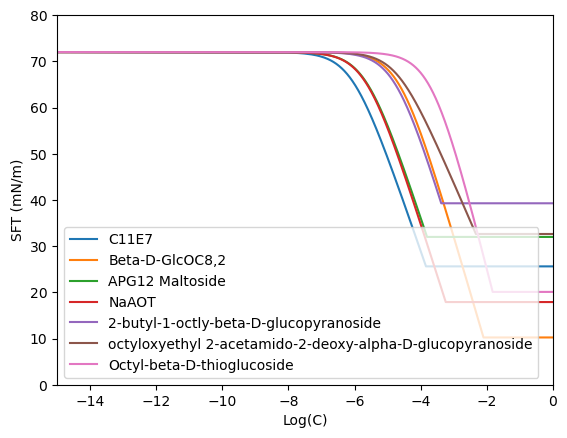

In [77]:
                # Single Figure for All Molecules
for i in range(0,len(dataset.index)):
    sft = []
    log_c = []
    for c in numpy.arange(0.000000000000001,10**(result_cmc[i]),0.00000001):
        sft.append((sft_0 - R * T * result_maxsec[i]*(10**(-6))*(10**3) * log(1 + 1000*(10**result_kl[i]) * c)))
    sft.append(sft_0 - R * T * result_maxsec[i]*(10**(-6))*(10**3) * log(1 + 1000*(10**result_kl[i]) * (10**result_cmc[i])))
    conc = numpy.arange(0.000000000000001,10**(result_cmc[i]),0.00000001)
    log_c =[log10(i) for i in conc]
    log_c.append(0)
    plt.plot(log_c, sft)
plt.legend(dataset["Name"], loc="lower left")
plt.ylabel("SFT (mN/m)")
plt.xlabel("Log(C)")
plt.xlim(-15,0)
plt.ylim(0,80)
plt.show()

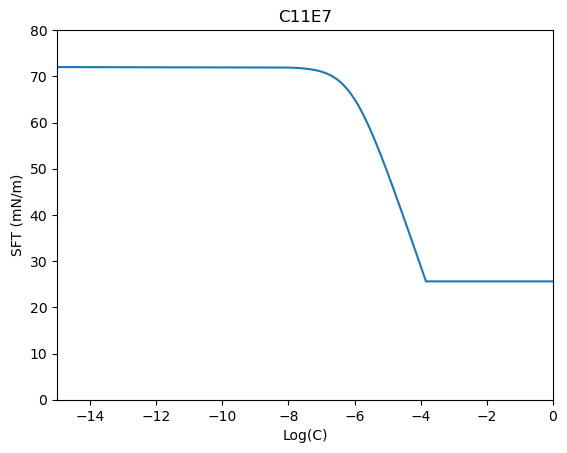

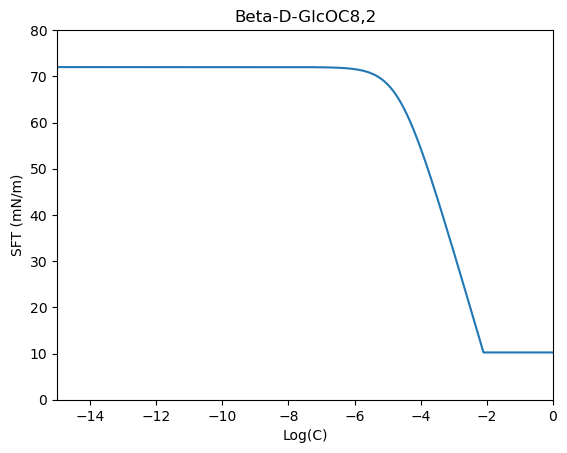

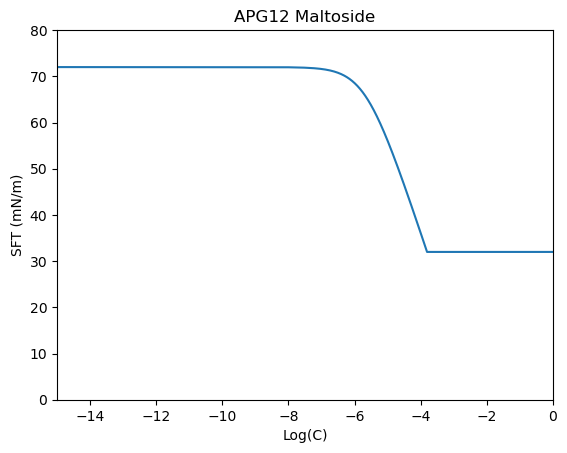

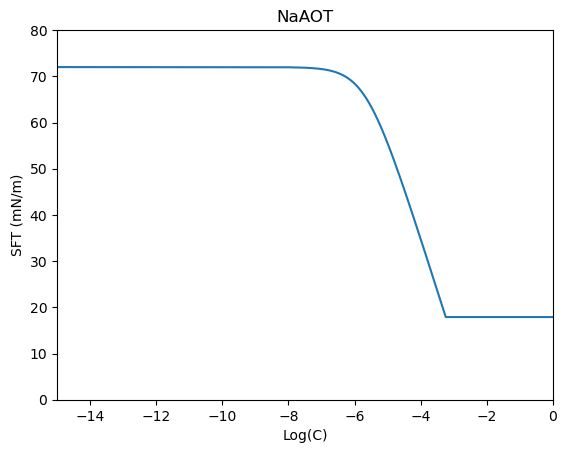

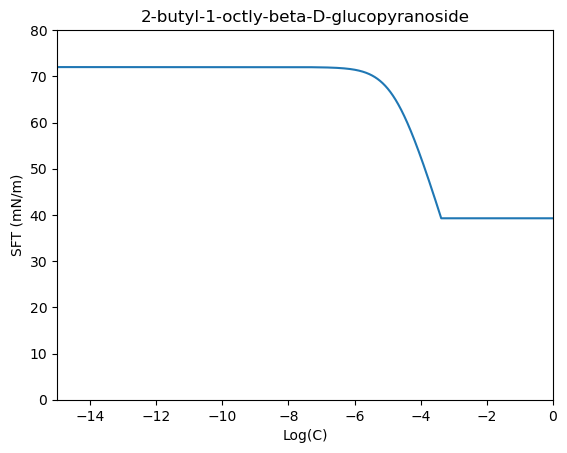

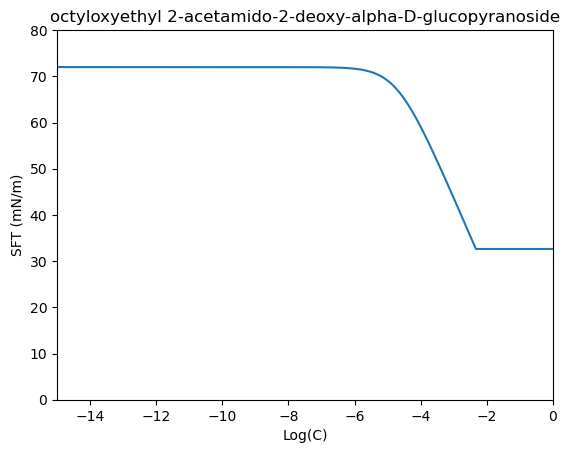

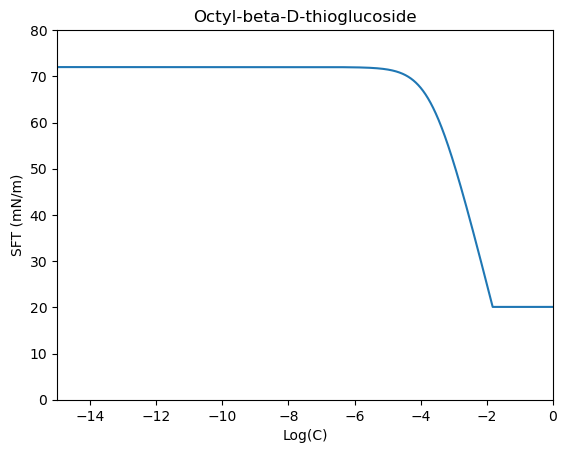

In [78]:
                # A Separate Figure for Each Molecule
for i in range(0,len(dataset.index)):
    sft = []
    log_c = []
    for c in numpy.arange(0.000000000000001,10**(result_cmc[i]),0.00000001):
        sft.append((sft_0 - R * T * result_maxsec[i]*(10**(-6))*(10**3) * log(1 + 1000*(10**result_kl[i]) * c)))
    sft.append(sft_0 - R * T * result_maxsec[i]*(10**(-6))*(10**3) * log(1 + 1000*(10**result_kl[i]) * (10**result_cmc[i])))
    conc = numpy.arange(0.000000000000001,10**(result_cmc[i]),0.00000001)
    log_c =[log10(i) for i in conc]
    log_c.append(0)
    plt.plot(log_c, sft)
    plt.title(dataset["Name"][i])
    plt.ylabel("SFT (mN/m)")
    plt.xlabel("Log(C)")
    plt.xlim(-15,0)
    plt.ylim(0,80)
    plt.show()